In [84]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import itertools
import warnings

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse

In [196]:
# Read raw dataset
days = pd.read_csv("../data/days_cleaned.csv", index_col=0)
days.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [197]:
days.index = pd.to_datetime(days.dteday)

In [198]:
days

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
2011-01-06,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
2011-01-07,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
2011-01-08,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
2011-01-09,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822


In [199]:
days.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq=None)

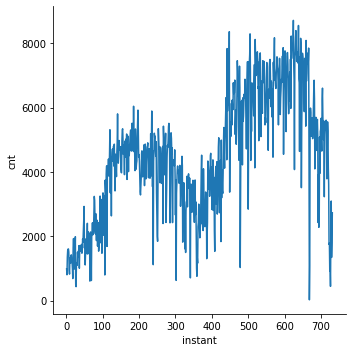

In [25]:
# Plot it
sns.relplot(x="instant", y="cnt", kind="line", data=days)

# Using a month lag

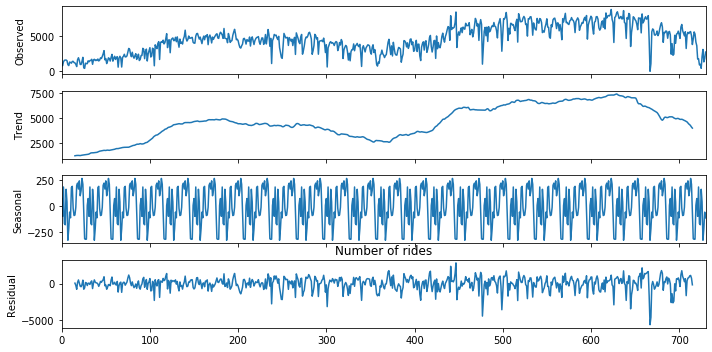

In [24]:
# Decomposition of the time serie. As the variation in the trend is more linear than exponential I apply an additive 
# decomposition
plt.rcParams["figure.figsize"] = [10, 5]
decomposed = sm.tsa.seasonal_decompose(days['cnt'], model="additive", freq=30)
decomposed_plot = decomposed.plot()

plt.title('Number of rides')

plt.show()

As the trend is kind of linearily upward and the seasonal curve is constant I was thinking of using the Holt's linear trend method but I will try ARIMA first. ????
But in order to be able to use ARIMA I need to check for Stationarity. I will do that using the Augmented Dickey Fuller test.


Hypotheses:

𝐻𝑂 : The data is not stationary

𝐻𝐴 : The data is stationary

In [27]:
# Perform Augmented Dickey Fuller on cnt
adfuller(days['cnt'])

(-1.8774481444374287,
 0.3427434403392199,
 13,
 717,
 {'1%': -3.439503230053971,
  '5%': -2.8655794463678346,
  '10%': -2.5689210707289982},
 11740.390931163352)

In [26]:
# Print the p value of the test
adfuller(days['cnt'])[1]

0.3427434403392199

We can't disprove the null hypothesis H0 so our data is not stationary.
In order to apply the ARIMA method we need stationary data. In order to transform our data we will use Differencing.
We can use differencing many times untill we find that our data is stationary. The amount of time we apply differencing will give us the d (for differencing) value we need to input in the ARIMA (p,d,q) model.

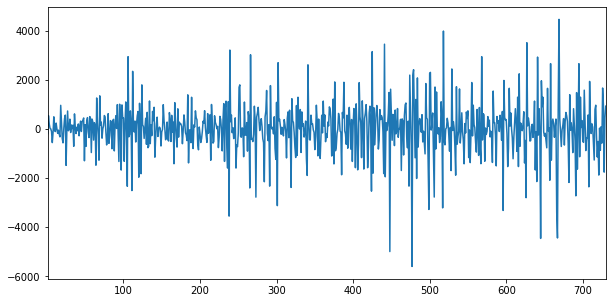

In [28]:
# Perform differencing on the data
days['cnt_diff'] = days['cnt'] - days['cnt'].shift(1)
days['cnt_diff'].dropna().plot()

In [31]:
# Perform Augmented Dickey Fuller on cnt_diff and print the p value of the test 
# I use dropna as the test can't be performed if there are some Nan's in the column
adfuller(days['cnt_diff'].dropna())[1]

1.0467797548020189e-21

This time we can reject the null hypothesis. Now we can say that the data is stationary after 1 differencing. Therefore we can use the ARIMA model with d=1.
In order to help me choose the other coefficients of the ARIMA model I'm going to plot the autocorrelation and partial autosorrelation functions for the differenced column cnt_diff

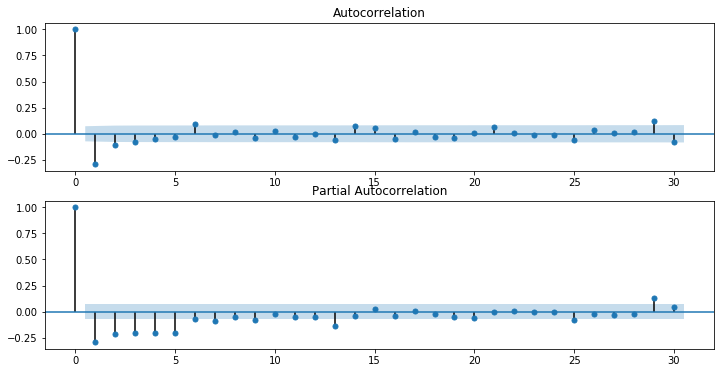

In [33]:
 from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(days.cnt_diff.dropna(), ax=ax[0], lags=30)
ax[1] = plot_pacf(days.cnt_diff.dropna(), ax=ax[1], lags=30)

I also plot the ones for cnt as a comparison

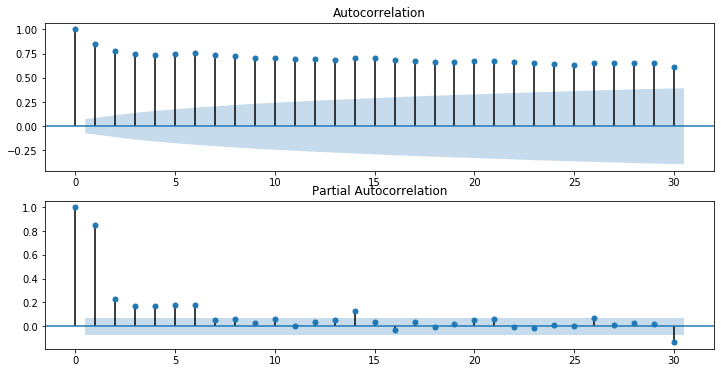

In [40]:
fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(days.cnt.dropna(), ax=ax[0], lags=30)
ax[1] = plot_pacf(days.cnt.dropna(), ax=ax[1], lags=30)

# Using a week lag

Now I realise that it probably makes more sense to use a lag of 7 (i.e. to compare weekdays) instead of a lag of 30 to compare the days of the month. So I'll do the same as above with lag = 7-

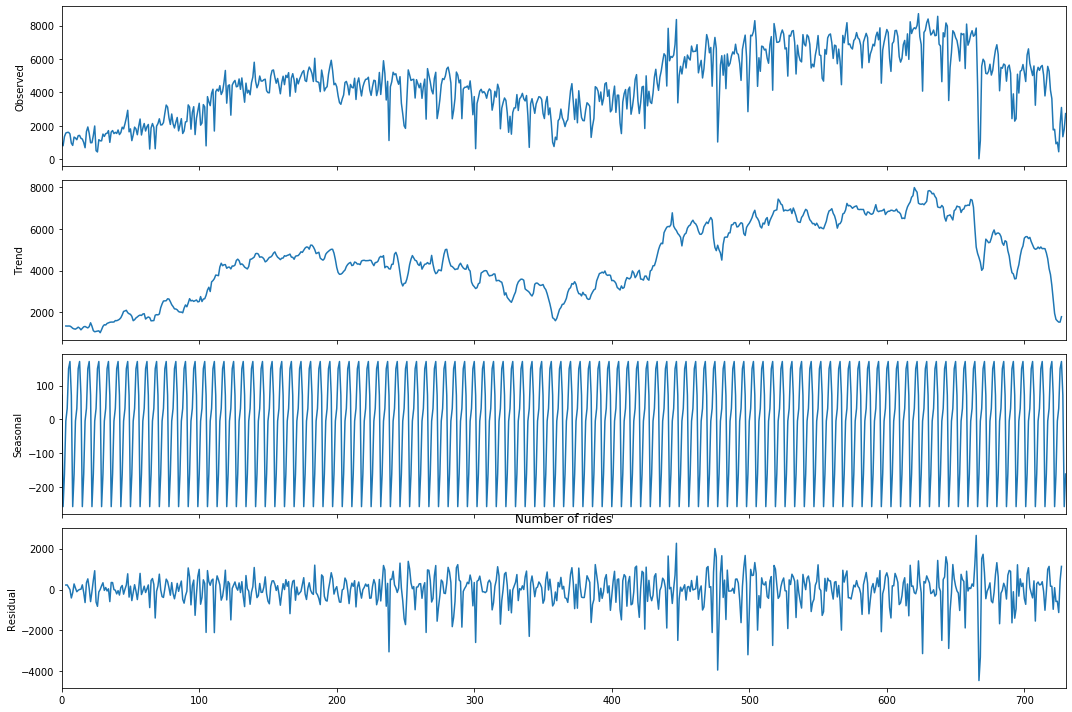

In [36]:
# Decomposition of the time serie. As the variation in the trend is more linear than exponential I apply an additive 
# decomposition with a lag (called freq) of 7
plt.rcParams["figure.figsize"] = [15, 10]
decomposed = sm.tsa.seasonal_decompose(days['cnt'], model="additive", freq=7)
decomposed_plot = decomposed.plot()

plt.title('Number of rides')

plt.show()

I want to apply the ARIMA model and to do so I need stationarity which has been achieved above with cnt_diff

To determine the other parameters of the ARIMA model I plot the autocorrelation and partial autocorrelation functions ACF and PACF for a lag = 7

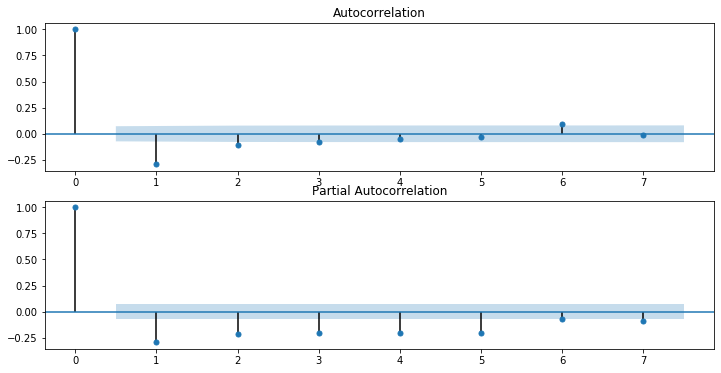

In [38]:
fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(days.cnt_diff.dropna(), ax=ax[0], lags=7)
ax[1] = plot_pacf(days.cnt_diff.dropna(), ax=ax[1], lags=7)

As we have a strong positive autocorrelation at lag-1 and a sharp decrease after that, it means that we should choose p=1. So far we have defined that we need an ARIMA(1,1,0) 


I also plot the ones for cnt as a comparison

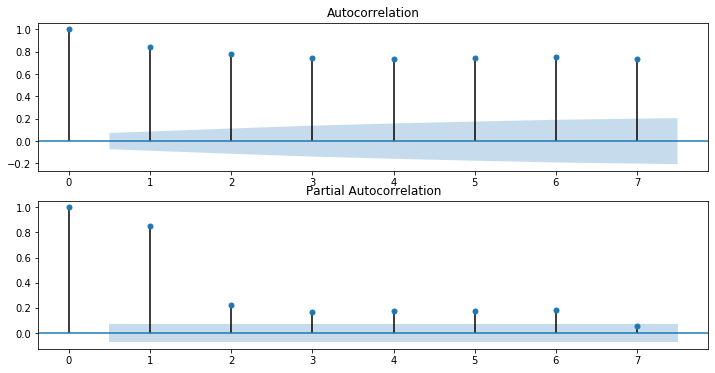

In [39]:
# stationarised data https://towardsdatascience.com/time-series-in-python-part-2-dealing-with-seasonal-data-397a65b74051
fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(days.cnt.dropna(), ax=ax[0], lags=7)
ax[1] = plot_pacf(days.cnt.dropna(), ax=ax[1], lags=7)

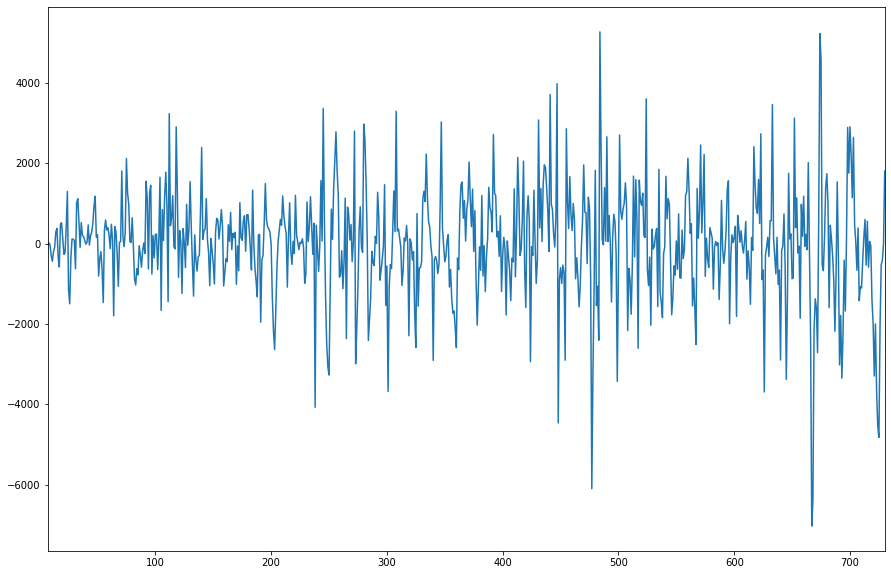

In [41]:
# Perform differencing on the data for 7 days (lag of a week)
days['cnt_diff7'] = days['cnt'] - days['cnt'].shift(7)
days['cnt_diff7'].dropna().plot()

In [43]:
# Print the p value of the test
adfuller(days['cnt_diff7'].dropna())[1]

3.012846476262914e-12

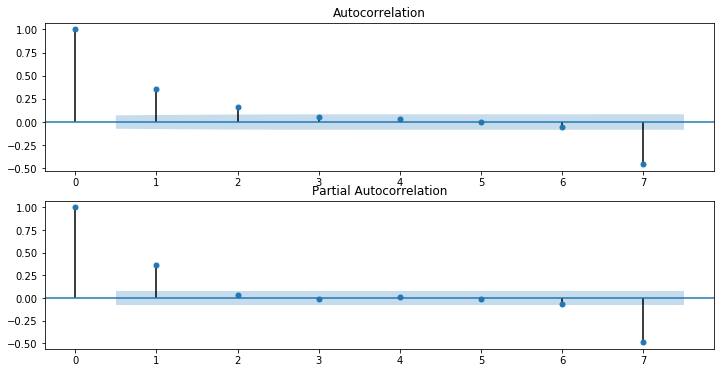

In [44]:
fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(days.cnt_diff7.dropna(), ax=ax[0], lags=7)
ax[1] = plot_pacf(days.cnt_diff7.dropna(), ax=ax[1], lags=7)

This ACF and PACF model suggest an AR type model (as the autocorrelation is positive and decaying towards 0) of 1 as there is a sharp decline after lag-1

In the end by combining what we found earlier for p,d,q in ARIMA we suggest a model SARIMA with the parameters SARIMA(1,1,0)(1,1,0)7

## SARIMA model analysis

I'll first define the training and test set. I choose all the data except the last month.

In [200]:
# Determine the number of rows I have 
days.shape

(731, 16)

In [201]:
# I remove 31 days to the number of rows to create the training set. So I will take until index number 699 (as it starts at 
# index = 0). 
#The test set is made of the remainder of the dataset
train, test = days.iloc[:699], days.iloc[700:]

In [206]:
# specify training data
data = train["cnt"]
# define model configuration
my_order = (1, 1, 0)
my_seasonal_order = (1, 1, 0, 7)
# define model
model = SARIMAX(data, order=my_order, seasonal_order=my_seasonal_order)

In [203]:
# Fit the model
model_fit = model.fit()

In [204]:
model_fit

In [205]:
# Have a look at some of the results of the model: the parameters, Standard Errors, and the Predicted Values
print('Predicted values: ', model_fit.predict())

Predicted values:  2011-01-01       0.000000
2011-01-02     817.361155
2011-01-03     858.603918
2011-01-04    1222.000885
2011-01-05    1536.983350
2011-01-06    1568.439479
2011-01-07    1689.498414
2011-01-08    2013.987241
2011-01-09    1131.366233
2011-01-10    1186.057357
2011-01-11    1437.116486
2011-01-12    1357.427403
2011-01-13    1206.249527
2011-01-14    1218.432147
2011-01-15    1380.749771
2011-01-16    1134.969512
2011-01-17    1691.696478
2011-01-18    1318.427753
2011-01-19     784.567014
2011-01-20    1451.252876
2011-01-21    1831.760604
2011-01-22    1275.701260
2011-01-23     946.597688
2011-01-24    1126.576316
2011-01-25    1155.560958
2011-01-26    2143.574424
2011-01-27    1360.611759
2011-01-28     366.514615
2011-01-29     525.166609
2011-01-30     986.317959
                 ...     
2012-10-31    1163.517680
2012-11-01    4038.235493
2012-11-02    4736.081603
2012-11-03    7165.151295
2012-11-04    3620.375444
2012-11-05    2461.483264
2012-11-06    5312.

In [60]:
# Calculate the Aikeke Information Criterion AIC for this specific model
print(model_fit.summary())

                                 Statespace Model Results                                
Dep. Variable:                               cnt   No. Observations:                  699
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 7)   Log Likelihood               -5889.002
Date:                           Mon, 19 Aug 2019   AIC                          11784.005
Time:                                   14:54:53   BIC                          11797.619
Sample:                                        0   HQIC                         11789.271
                                           - 699                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3175      0.031    -10.175      0.000      -0.379      -0.256
ar.S.L7       -0.5347      0.024    -22.671

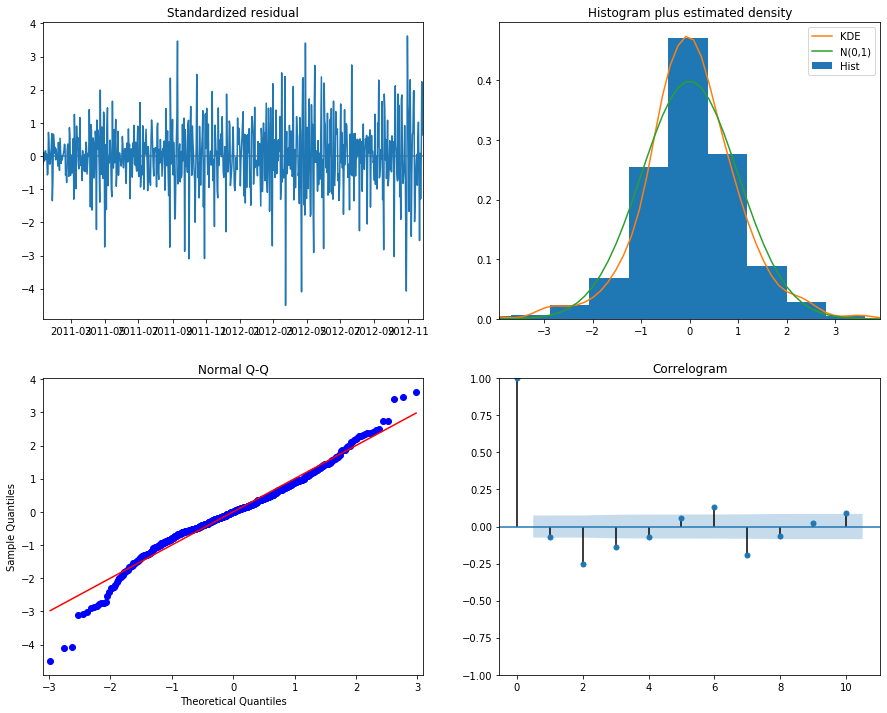

In [259]:
# Plot a summary of statistics to see if we follow the assumptions made by the model
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

Now we will do a Grid Search to try to find out what are the best parameters to select for SARIMA.

The first step is to create all the possible combinations of parameters we will try.

The second step is to calculate the AIC for every combination of parameters. The model with the lowest AIC is the one we will select as the best model.

In [92]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 0, 2, 7)
SARIMAX: (0, 0, 2) x (0, 1, 0, 7)
SARIMAX: (0, 0, 2) x (0, 1, 1, 7)


In [94]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 7)7 - AIC:13852.406672403242
ARIMA(0, 0, 0)x(0, 0, 1, 7)7 - AIC:13309.549907229612
ARIMA(0, 0, 0)x(0, 0, 2, 7)7 - AIC:12581.48169113193
ARIMA(0, 0, 0)x(0, 1, 0, 7)7 - AIC:11882.046397266713
ARIMA(0, 0, 0)x(0, 1, 1, 7)7 - AIC:11529.554675361904
ARIMA(0, 0, 0)x(0, 1, 2, 7)7 - AIC:11411.430568695698
ARIMA(0, 0, 0)x(0, 2, 0, 7)7 - AIC:12501.725478381539
ARIMA(0, 0, 0)x(0, 2, 1, 7)7 - AIC:11705.436138859202
ARIMA(0, 0, 0)x(0, 2, 2, 7)7 - AIC:11425.335669406846
ARIMA(0, 0, 0)x(1, 0, 0, 7)7 - AIC:11890.105844505768
ARIMA(0, 0, 0)x(1, 0, 1, 7)7 - AIC:11643.43449612367
ARIMA(0, 0, 0)x(1, 0, 2, 7)7 - AIC:11525.548379563688
ARIMA(0, 0, 0)x(1, 1, 0, 7)7 - AIC:11607.645768247809
ARIMA(0, 0, 0)x(1, 1, 1, 7)7 - AIC:11524.957012002324
ARIMA(0, 0, 0)x(1, 1, 2, 7)7 - AIC:11408.442199065288
ARIMA(0, 0, 0)x(1, 2, 0, 7)7 - AIC:12002.983292614295
ARIMA(0, 0, 0)x(1, 2, 1, 7)7 - AIC:11507.052180231192
ARIMA(0, 0, 0)x(1, 2, 2, 7)7 - AIC:11371.99721892575
ARIMA(0, 0, 0)x(2, 0, 0, 7)7 - 

ARIMA(0, 1, 2)x(2, 0, 0, 7)7 - AIC:11291.078649595383
ARIMA(0, 1, 2)x(2, 0, 1, 7)7 - AIC:11286.888715129062
ARIMA(0, 1, 2)x(2, 0, 2, 7)7 - AIC:11241.996057983004
ARIMA(0, 1, 2)x(2, 1, 0, 7)7 - AIC:11314.020516723202
ARIMA(0, 1, 2)x(2, 1, 1, 7)7 - AIC:11186.606102555807
ARIMA(0, 1, 2)x(2, 1, 2, 7)7 - AIC:11139.562025730502
ARIMA(0, 1, 2)x(2, 2, 0, 7)7 - AIC:11599.15112946231
ARIMA(0, 1, 2)x(2, 2, 1, 7)7 - AIC:11231.705880253176
ARIMA(0, 1, 2)x(2, 2, 2, 7)7 - AIC:11113.014505164248
ARIMA(0, 2, 0)x(0, 0, 0, 7)7 - AIC:12348.41303205183
ARIMA(0, 2, 0)x(0, 0, 1, 7)7 - AIC:12230.06879250698
ARIMA(0, 2, 0)x(0, 0, 2, 7)7 - AIC:12111.760326695208
ARIMA(0, 2, 0)x(0, 1, 0, 7)7 - AIC:12744.553867050774
ARIMA(0, 2, 0)x(0, 1, 1, 7)7 - AIC:12127.509606499909
ARIMA(0, 2, 0)x(0, 1, 2, 7)7 - AIC:12107.322355220309
ARIMA(0, 2, 0)x(0, 2, 0, 7)7 - AIC:13393.633010912421
ARIMA(0, 2, 0)x(0, 2, 1, 7)7 - AIC:12520.082350091885
ARIMA(0, 2, 0)x(0, 2, 2, 7)7 - AIC:11933.555047576076
ARIMA(0, 2, 0)x(1, 0, 0, 7)7 - 

ARIMA(1, 0, 2)x(1, 0, 0, 7)7 - AIC:11404.511890662037
ARIMA(1, 0, 2)x(1, 0, 1, 7)7 - AIC:11372.218711486956
ARIMA(1, 0, 2)x(1, 0, 2, 7)7 - AIC:11259.730250156474
ARIMA(1, 0, 2)x(1, 1, 0, 7)7 - AIC:11493.025098579812
ARIMA(1, 0, 2)x(1, 1, 1, 7)7 - AIC:11368.377769047262
ARIMA(1, 0, 2)x(1, 1, 2, 7)7 - AIC:11211.685684820708
ARIMA(1, 0, 2)x(1, 2, 0, 7)7 - AIC:11907.162355020562
ARIMA(1, 0, 2)x(1, 2, 1, 7)7 - AIC:11377.830827153843
ARIMA(1, 0, 2)x(1, 2, 2, 7)7 - AIC:11535.889950285946
ARIMA(1, 0, 2)x(2, 0, 0, 7)7 - AIC:11294.402158308014
ARIMA(1, 0, 2)x(2, 0, 1, 7)7 - AIC:11290.727910453272
ARIMA(1, 0, 2)x(2, 0, 2, 7)7 - AIC:11261.42432926056
ARIMA(1, 0, 2)x(2, 1, 0, 7)7 - AIC:11306.380964412767
ARIMA(1, 0, 2)x(2, 1, 1, 7)7 - AIC:11186.389586512501
ARIMA(1, 0, 2)x(2, 1, 2, 7)7 - AIC:11240.758626261157
ARIMA(1, 0, 2)x(2, 2, 0, 7)7 - AIC:11585.015695218175
ARIMA(1, 0, 2)x(2, 2, 1, 7)7 - AIC:11220.864762994257
ARIMA(1, 0, 2)x(2, 2, 2, 7)7 - AIC:11657.339445303913
ARIMA(1, 1, 0)x(0, 0, 0, 7)7 

ARIMA(1, 2, 2)x(0, 0, 0, 7)7 - AIC:11486.886316524426
ARIMA(1, 2, 2)x(0, 0, 1, 7)7 - AIC:11397.355706311748
ARIMA(1, 2, 2)x(0, 0, 2, 7)7 - AIC:11266.305509900178
ARIMA(1, 2, 2)x(0, 1, 0, 7)7 - AIC:11786.335873739066
ARIMA(1, 2, 2)x(0, 1, 1, 7)7 - AIC:11422.517121058203
ARIMA(1, 2, 2)x(0, 1, 2, 7)7 - AIC:11308.740768816975
ARIMA(1, 2, 2)x(0, 2, 0, 7)7 - AIC:12403.594105435974
ARIMA(1, 2, 2)x(0, 2, 1, 7)7 - AIC:11895.874163303617
ARIMA(1, 2, 2)x(0, 2, 2, 7)7 - AIC:11692.847221740181
ARIMA(1, 2, 2)x(1, 0, 0, 7)7 - AIC:11409.350386359774
ARIMA(1, 2, 2)x(1, 0, 1, 7)7 - AIC:11379.578810306022
ARIMA(1, 2, 2)x(1, 0, 2, 7)7 - AIC:11267.885404247692
ARIMA(1, 2, 2)x(1, 1, 0, 7)7 - AIC:11559.44322157553
ARIMA(1, 2, 2)x(1, 1, 1, 7)7 - AIC:11423.45778410915
ARIMA(1, 2, 2)x(1, 1, 2, 7)7 - AIC:11308.373592953449
ARIMA(1, 2, 2)x(1, 2, 0, 7)7 - AIC:12041.196922154588
ARIMA(1, 2, 2)x(1, 2, 1, 7)7 - AIC:11844.179325245681
ARIMA(1, 2, 2)x(1, 2, 2, 7)7 - AIC:11693.650297480128
ARIMA(1, 2, 2)x(2, 0, 0, 7)7 -

ARIMA(2, 1, 1)x(2, 0, 0, 7)7 - AIC:11261.8659423717
ARIMA(2, 1, 1)x(2, 0, 1, 7)7 - AIC:11252.827197490715
ARIMA(2, 1, 1)x(2, 0, 2, 7)7 - AIC:11260.014436654103
ARIMA(2, 1, 1)x(2, 1, 0, 7)7 - AIC:11273.091350870382
ARIMA(2, 1, 1)x(2, 1, 1, 7)7 - AIC:11154.164788804357
ARIMA(2, 1, 1)x(2, 1, 2, 7)7 - AIC:11154.206742473973
ARIMA(2, 1, 1)x(2, 2, 0, 7)7 - AIC:11558.153464576997
ARIMA(2, 1, 1)x(2, 2, 1, 7)7 - AIC:11350.43687068712
ARIMA(2, 1, 1)x(2, 2, 2, 7)7 - AIC:11659.37996555957
ARIMA(2, 1, 2)x(0, 0, 0, 7)7 - AIC:11457.45663517165
ARIMA(2, 1, 2)x(0, 0, 1, 7)7 - AIC:11368.054287791141
ARIMA(2, 1, 2)x(0, 0, 2, 7)7 - AIC:11241.059862169108
ARIMA(2, 1, 2)x(0, 1, 0, 7)7 - AIC:11768.351460711543
ARIMA(2, 1, 2)x(0, 1, 1, 7)7 - AIC:11355.493093935633
ARIMA(2, 1, 2)x(0, 1, 2, 7)7 - AIC:11304.069081628213
ARIMA(2, 1, 2)x(0, 2, 0, 7)7 - AIC:12341.807231936626
ARIMA(2, 1, 2)x(0, 2, 1, 7)7 - AIC:11871.489869168672
ARIMA(2, 1, 2)x(0, 2, 2, 7)7 - AIC:11667.593754528101
ARIMA(2, 1, 2)x(1, 0, 0, 7)7 - AI

The settings with the lowest AIC are below:

ARIMA(1, 1, 1)x(0, 2, 2, 7)7 - AIC:11089.634892601633

ARIMA(2, 1, 1)x(0, 2, 2, 7)7 - AIC:11090.945525176723

I select ARIMA ARIMA(1, 1, 1)x(0, 2, 2, 7)7 to plot the prediction compared to reality

In [207]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(1, 1, 1),
                                seasonal_order=(0, 2, 2, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3223      0.035      9.130      0.000       0.253       0.391
ma.L1         -1.1048      0.023    -48.682      0.000      -1.149      -1.060
ma.S.L7       -1.9569      0.048    -40.786      0.000      -2.051      -1.863
ma.S.L14       0.9562      0.047     20.501      0.000       0.865       1.048
sigma2      6.914e+05   1.22e-07   5.66e+12      0.000    6.91e+05    6.91e+05


The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. 

The P>|z| column informs us of the significance of each feature weight. 

Each weight has a p-value lower or close to 0.05, so it is reasonable to retain all of them in our model.


Let's plot a summary of statistics to ensure that we didn't violate any of the assumptions made by the model.

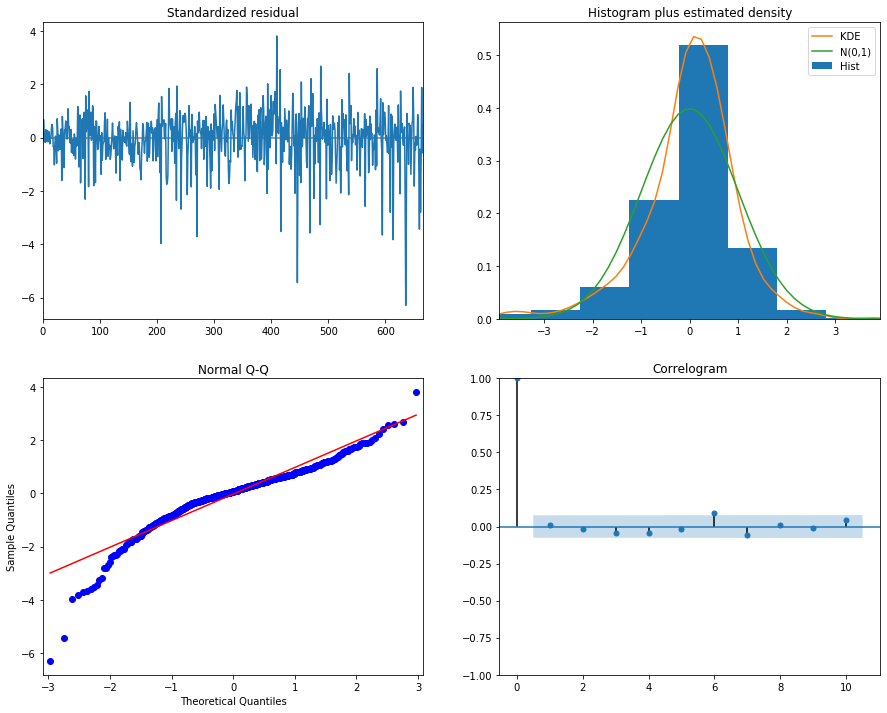

In [130]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

We want to check that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.


1. In the top right plot, we see that the red KDE line doesn't follow completely the N(0,1) (the standard notation for a normal distribution with mean 0 and standard deviation of 1). 

2. The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1) but not perfectly. This shows that the residuals are not perfectly normally distributed.

3. The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

Because of points 1 and 2 we can see that our model could be further improved.

Nevertheless let's see how this model performs to predict the test data.

In [210]:
pred = results.get_prediction(dynamic=False)
pred_ci = pred.conf_int()

In [211]:
# Look at the predicted data out of pred
pred.predicted_mean

2011-01-01       0.000000
2011-01-02    1064.367283
2011-01-03     840.111567
2011-01-04    1355.641438
2011-01-05    1562.623087
2011-01-06    1599.943681
2011-01-07    1605.940494
2011-01-08    2737.421133
2011-01-09     848.115311
2011-01-10    1513.308398
2011-01-11    1694.936263
2011-01-12    1405.683393
2011-01-13    1150.944827
2011-01-14    1026.636531
2011-01-15     729.492511
2011-01-16     657.983131
2011-01-17    1636.275817
2011-01-18    1000.171181
2011-01-19     705.667390
2011-01-20    1747.256706
2011-01-21    1838.168590
2011-01-22    1179.472181
2011-01-23     915.686351
2011-01-24     912.825996
2011-01-25     830.583577
2011-01-26    2342.624412
2011-01-27    1574.389762
2011-01-28     893.989622
2011-01-29     592.328315
2011-01-30     944.081769
                 ...     
2012-10-31    4717.644870
2012-11-01    6006.690780
2012-11-02    5927.385538
2012-11-03    6073.403891
2012-11-04    4601.114103
2012-11-05    4869.256353
2012-11-06    5274.189492
2012-11-07  

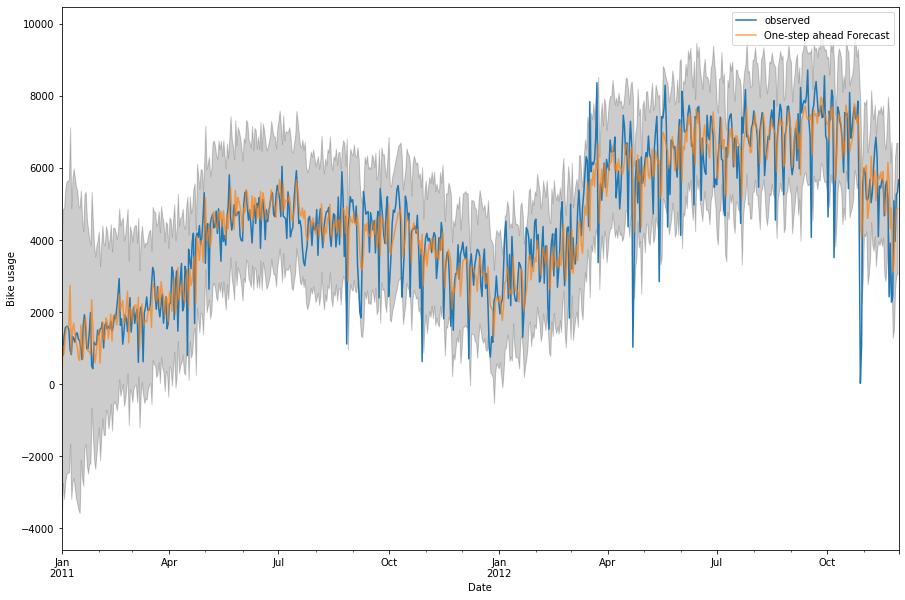

In [223]:
# Plot the prediction (One Step ahead forecast) vs the observed (= data used for training) with the confidence interval
ax = days["cnt"].iloc[:700].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Bike usage')
plt.legend()

plt.show()

In order to determine the error made we can calculate the Mean Absolute Percentage Error (MAPE)

In [230]:
# Define a function to calculate the Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(x, y): 
    y_true, y_pred = np.array(x), np.array(y)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [240]:
# Calculation of MAPE for the previous graph
y_forecasted = pred.predicted_mean
y_observed = days["cnt"].iloc[0:700]
y_observed_1 = days["cnt"].iloc[1:700]
y_observed_699 = days["cnt"].iloc[0:699]

mean_absolute_percentage_error(y_forecasted, y_observed_1)


inf

## Forecast of the next month

Now that we have checked that our prediction matches the training set, we will see how it can forecast the following month (i.e. the last month of data available to us to test our future behaviour)

We will do the following:

1. Forecast the data for the next 30 days
2. Plot the forecast compared to the train data we have
3. Forecast for an even longer time and plot this too

In [257]:
# Get forecast 31 steps ahead in future (i.e. for next month)
pred_uc = results.get_forecast(steps=100)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

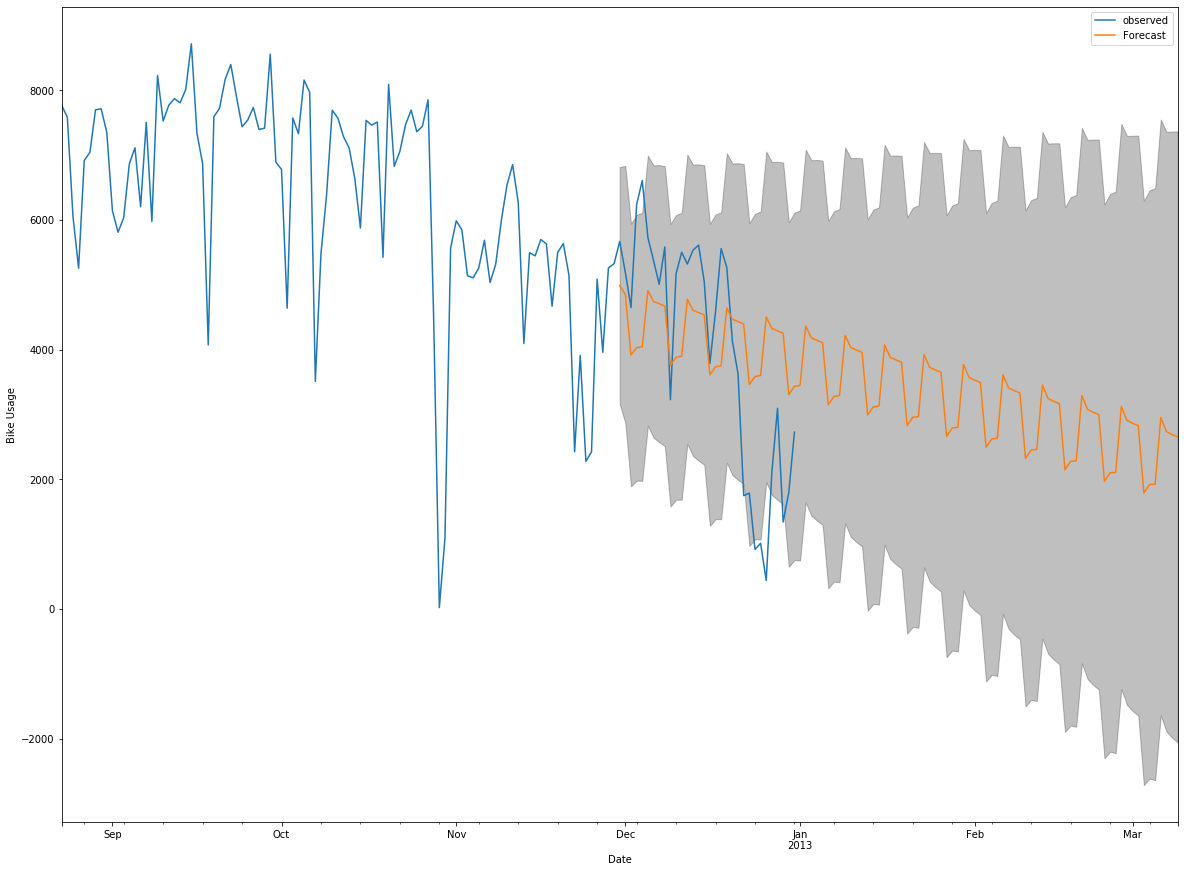

In [258]:
# Plot the forecast compared with the data already available
ax = days["cnt"].iloc[600:731].plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Bike Usage')

plt.legend()
plt.show()

In [ ]:
pred = results.get_prediction(dynamic=False)
pred_ci = pred.conf_int()


# Get forecast 31 steps ahead in future (i.e. for next month)
pred_uc = results.get_forecast(steps=100)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()




In [264]:
results.predict().index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-11-20', '2012-11-21', '2012-11-22', '2012-11-23',
               '2012-11-24', '2012-11-25', '2012-11-26', '2012-11-27',
               '2012-11-28', '2012-11-29'],
              dtype='datetime64[ns]', length=699, freq='D')

In [263]:
results.predict()

2011-01-01       0.000000
2011-01-02    1064.367283
2011-01-03     840.111567
2011-01-04    1355.641438
2011-01-05    1562.623087
2011-01-06    1599.943681
2011-01-07    1605.940494
2011-01-08    2737.421133
2011-01-09     848.115311
2011-01-10    1513.308398
2011-01-11    1694.936263
2011-01-12    1405.683393
2011-01-13    1150.944827
2011-01-14    1026.636531
2011-01-15     729.492511
2011-01-16     657.983131
2011-01-17    1636.275817
2011-01-18    1000.171181
2011-01-19     705.667390
2011-01-20    1747.256706
2011-01-21    1838.168590
2011-01-22    1179.472181
2011-01-23     915.686351
2011-01-24     912.825996
2011-01-25     830.583577
2011-01-26    2342.624412
2011-01-27    1574.389762
2011-01-28     893.989622
2011-01-29     592.328315
2011-01-30     944.081769
                 ...     
2012-10-31    4717.644870
2012-11-01    6006.690780
2012-11-02    5927.385538
2012-11-03    6073.403891
2012-11-04    4601.114103
2012-11-05    4869.256353
2012-11-06    5274.189492
2012-11-07  

In [267]:
# Determine what is the difference between predict, get_prediction and get_forecast
# What happens with get_prediction with a start date of 2012-01-01
pred = results.get_prediction(start="2012-01-01", dynamic=False)
pred_ci = pred.conf_int()

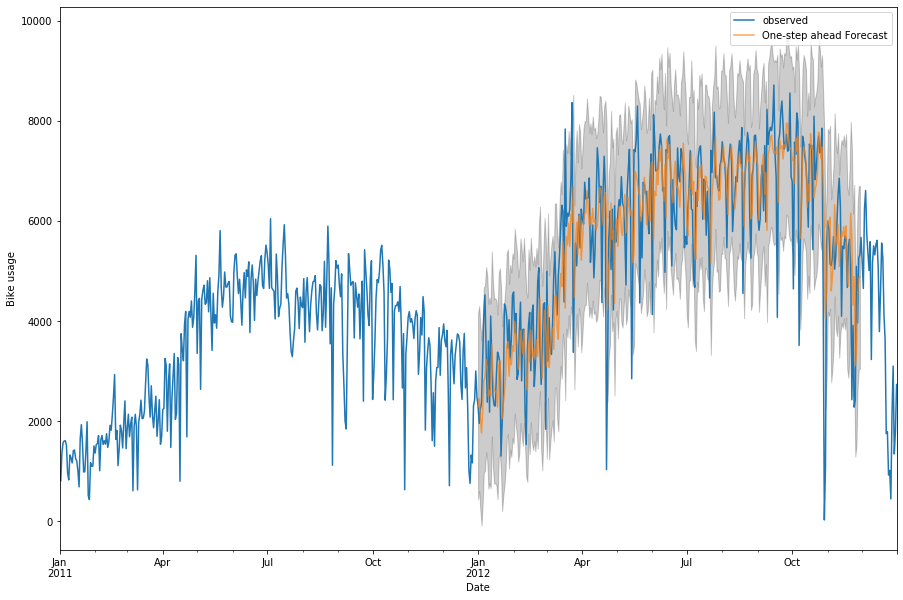

In [268]:
# Plot the prediction (One Step ahead forecast) vs the observed (= data used for training) with the confidence interval
ax = days["cnt"].iloc[:731].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Bike usage')
plt.legend()

plt.show()

The plot with get_predicition doesn't go over the train set limit and stops end of Nov 2012

In [272]:
# What happens with predict with a start date of 2012-01-01
pred = results.predict(start="2012-01-01", dynamic=False)

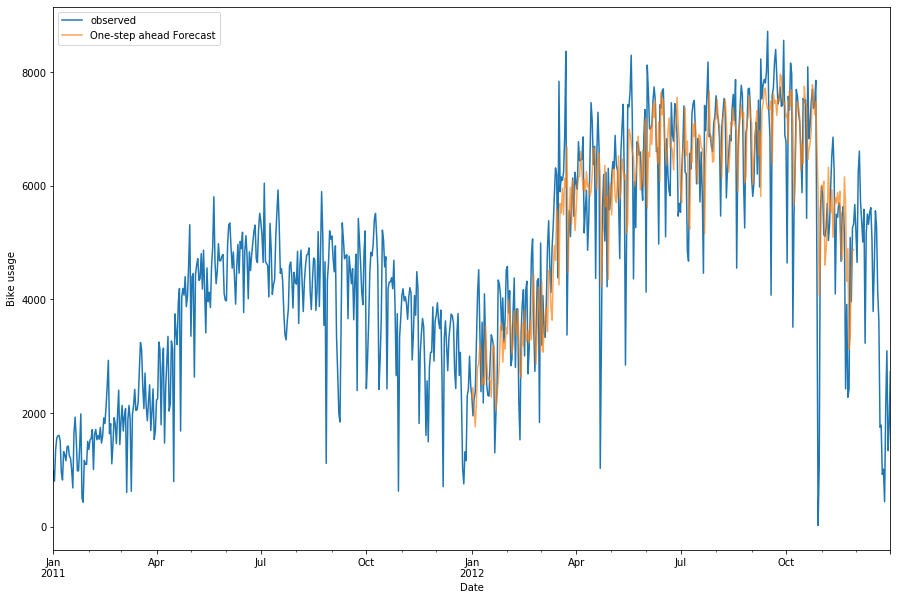

In [274]:
# Plot the prediction (One Step ahead forecast) vs the observed (= data used for training) with the confidence interval
ax = days["cnt"].iloc[:731].plot(label='observed')
pred.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)


ax.set_xlabel('Date')
ax.set_ylabel('Bike usage')
plt.legend()

plt.show()

predict gives the same result as get_prediction but it doesn't give you the option of calculation the confidence interval whereas it is available to get_prediction

In [278]:
# What happens with get_prediction with a start date of 2012-12-01
pred = results.get_prediction(start="2012-11-01", dynamic=False)
pred_ci = pred.conf_int()

It gives an error. This is not possible. Predict and get_prediciton doesn't go in the future

In [289]:
# What happens with dynamic forecast with a start date of 2012-06-01
pred_dynamic = results.get_prediction(start='2012-06-01', dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

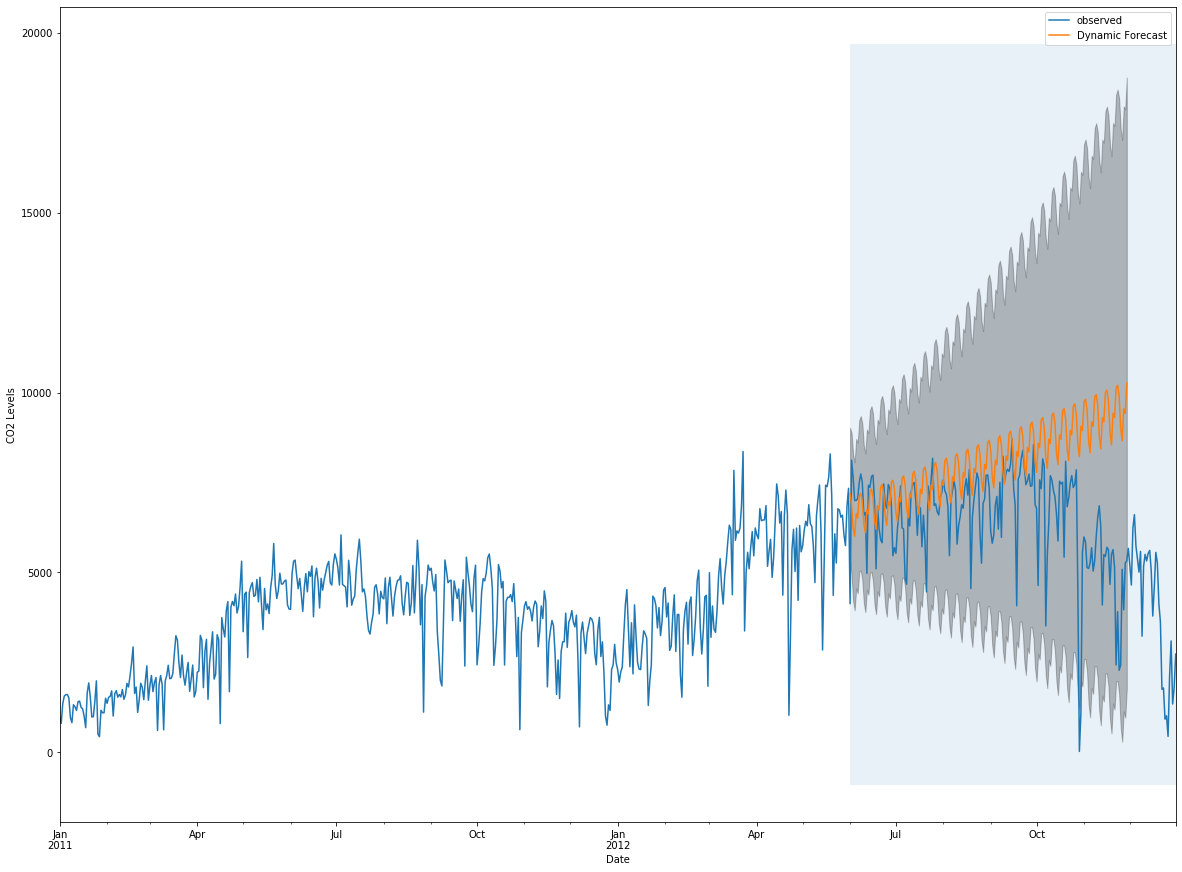

In [290]:
# Plot the prediction (Dynamic forecast) vs the observed (= data used for training) with the confidence interval
ax = days["cnt"].iloc[:731].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), '2012-06-01', days.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [291]:
# What happens with dynamic forecast with a start date of 2012-09-01
pred_dynamic = results.get_prediction(start='2012-09-01', dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

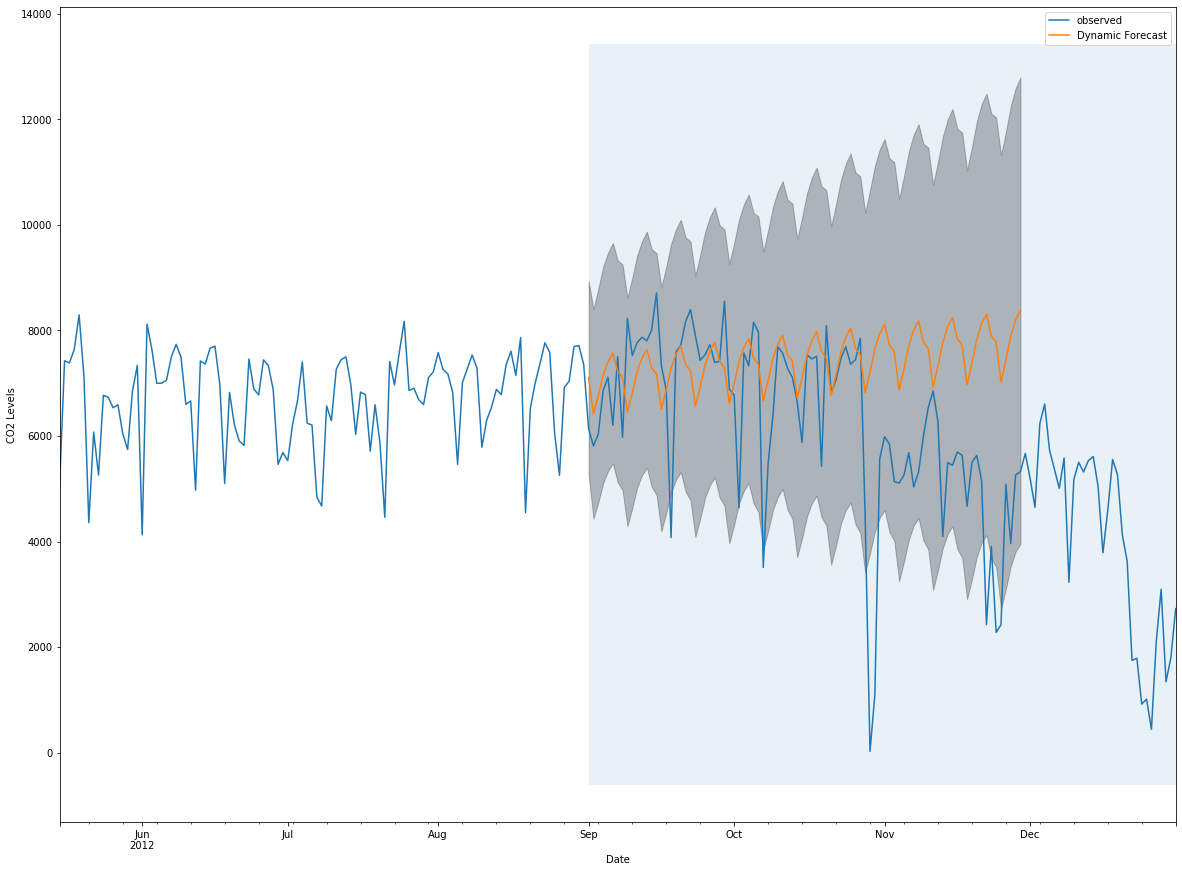

In [294]:
# Plot the prediction (Dynamic forecast) vs the observed (= data used for training) with the confidence interval
ax = days["cnt"].iloc[500:731].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), '2012-09-01', days.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [ ]:
# Calculate RMSE Root Maeaned Square Error
# rmse(test["cnt"], model_fit, axis=0)

# making predictions
predictions = model_fit.predict(1, 30)
print(predictions)

In [ ]:
# root mean squared error or rmse
sqrt(mean_squared_error(actual, predicted))